#Location Data
The code and plots below reflect a sample of the location data collected between Jan. 2014 and Aug. 2014. I am currently working on displaying the x-axis with more clear labels of the locations plotted. I also want to explore displaying only the more interesting locations (>1 or >5) data points.

In [1]:
%matplotlib inline

import numpy as np
import pylab
import os
import operator

In [2]:
raw_gae_data = '../data/gae_data/asn/master_2014_asn.csv'
#print 'Raw GAE data shape: ', len(raw_gae_data)
asn_data = np.loadtxt(raw_gae_data, dtype='string', delimiter=',')
print asn_data.shape

(143780, 103)


In [9]:
#x = np.array([(1.0, 2), (3.0, 4)], dtype=[('x', float), ('y', int)])
asnNums = asn_data[:,3]
thru_max = asn_data[:,33]

# Create lists of all throughputs, length of these lists will be number of users per ASN
# Can also calculate average throughputs for an ASN this way
thru_lists = {}
asnDict = {}
for x in xrange(len(asn_data)):
    asnNum = asnNums[x]
    thru = thru_max[x]
    if not asnNum == 'TrackData.ASN' and not thru == 'ThroughoutData.Max':
        if asnNum not in thru_lists:
            thru_lists[asnNum] = []
        if asnNum not in asnDict:
            asnDict[asnNum] = 1
        else:
            asnDict[asnNum] = asnDict[asnNum] + 1
        try:
            thru_lists[asnNum].append(float(thru))
        except:
            pass

In [10]:
average_thru = {}
for key in thru_lists.keys():
    l = thru_lists[key]
    if not len(l) == 0:
        average = sum(l)/len(l)
        average_thru[key] = (average, len(l))
        
sorted_avg_thru = sorted(average_thru.items(), key=operator.itemgetter(1), reverse=True)

In [11]:
with open('../data/simplified_thruput.csv', 'w') as simple_thru:
    simple_thru.write('ASN,Average Throughput, Number of Users\n')
    for key, tup in sorted_avg_thru:
        tup = average_thru[key]
        avg = tup[0]
        ln = tup[1]
        s = "{0},{1},{2}\n".format(key, avg, ln)
        simple_thru.write(s)

In [12]:
sortedASNs = sorted(asnDict.items(), key=operator.itemgetter(1), reverse=True)

In [14]:
ASnumbers = []
users = []

for key, value in sortedASNs:
    ASnumbers.append(key)
    users.append(y)

TypeError: float() argument must be a string or a number

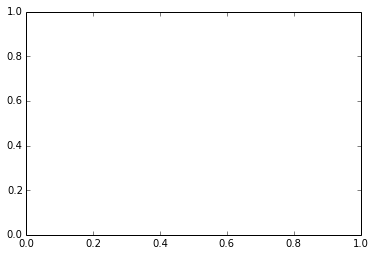

In [16]:
pylab.plot(asnDict)

pylab.title('Number of Users by ASN number')
pylab.ylabel('Number of Users')
pylab.xlabel('ASN number')

###Location Data: Num users by ASN number
Above is a plot of the the AS numbers and the number of users .

In [4]:
loc_gae_data = np.loadtxt('../data/gae_data/loc/master_2014_loc.csv', dtype='string', delimiter=',')

fields = loc_gae_data[0,:]
print fields

['Key' 'RemoteAddr' 'GetTime' 'PostTime' 'UserID' 'Country' 'Region' 'City'
 'Latitude' 'Longitude' 'DevKey' 'TestForm' 'AppVersionID' 'RequestID'
 'TestError' 'TestDataKey' '""']


In [5]:
print loc_gae_data.shape

(421961, 17)


In [6]:
asn_cities = loc_gae_data[:,7]

city_dict = {}
for entry in asn_cities:
    if entry not in city_dict and entry is not "City":
        city_dict[entry] = 1
    else:
        city_dict[entry] = city_dict[entry] + 1
    

In [7]:
#print city_dict

sortedCities = sorted(city_dict.items(), key=operator.itemgetter(1), reverse=True)

#print sortedCities

In [8]:
xs = []
ys = []

for x,y in sortedCities:
    xs.append(x)
    ys.append(y)

###Location Data: Num of users by City
The plot shown below is a plot of the number of users and their city. Data is collected by pulling from the "City" column of the location data, then counted and sorted.

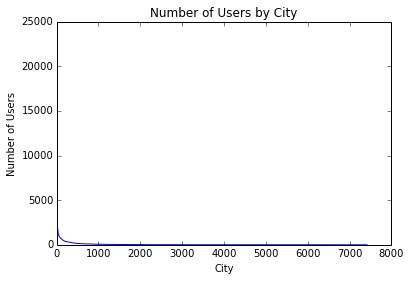

In [9]:
pylab.plot(ys)
pylab.title('Number of Users by City')
pylab.ylabel('Number of Users')
pylab.xlabel('City')

In [27]:
asn_cities = loc_gae_data[:,7]
asn_coords = loc_gae_data[:,8:10]

city_count = {}
city_coords = {}
for x in xrange(len(asn_cities)):
    city = asn_cities[x]
    coords = asn_coords[x]
    if city not in city_count and city is not "City":
        city_count[city] = 1
        city_coords[city] = coords
    else:
        city_count[city] = city_count[city] + 1
    

In [8]:
city_coords_count = {}
for city in city_dict.keys():
    city_coords_count[city] = (city_count[city], city_coords[city])

NameError: name 'city_dict' is not defined

In [30]:
#Finally, write to a file with just (City, Count, Coordinates)
with open('../data/simplified_loc.csv', 'w') as simple:
    simple.write('city,count,lat,long\n')
    for key in city_coords_count.keys():
        tup = city_coords_count[key]
        count = tup[0]
        coords = tup[1]
        s = "{0},{1},{2},{3}\n".format(key, count, coords[0], coords[1])
        simple.write(s)
        simple.flush()